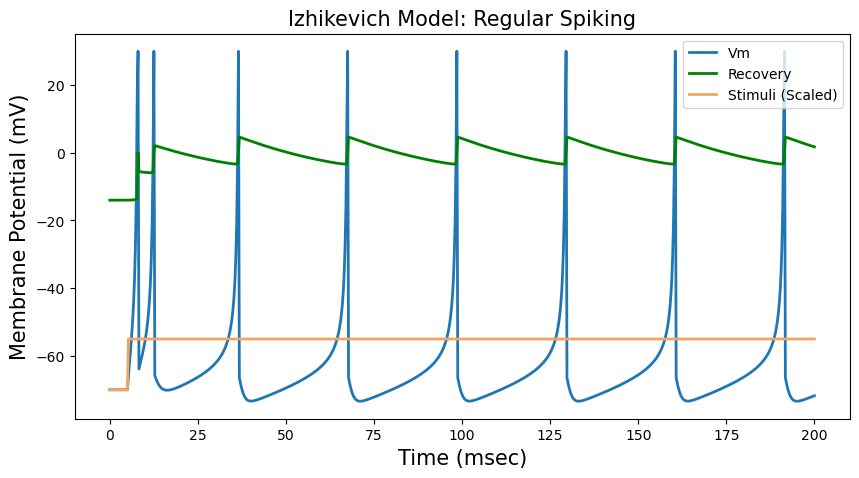

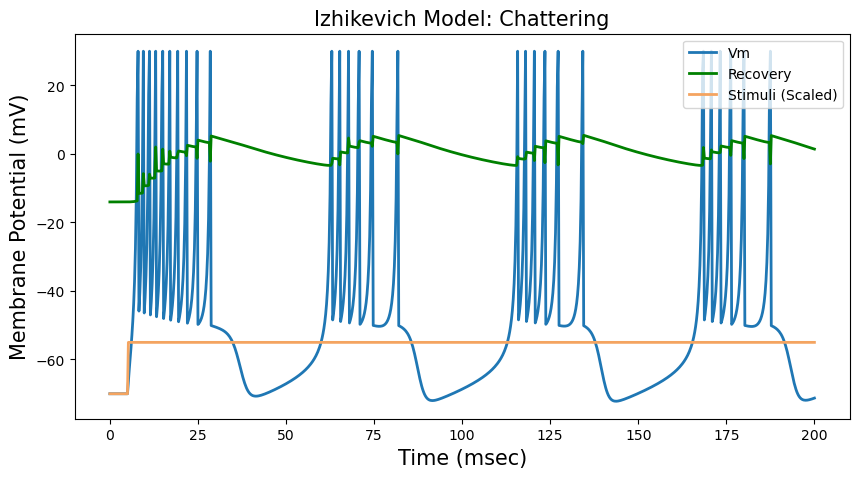

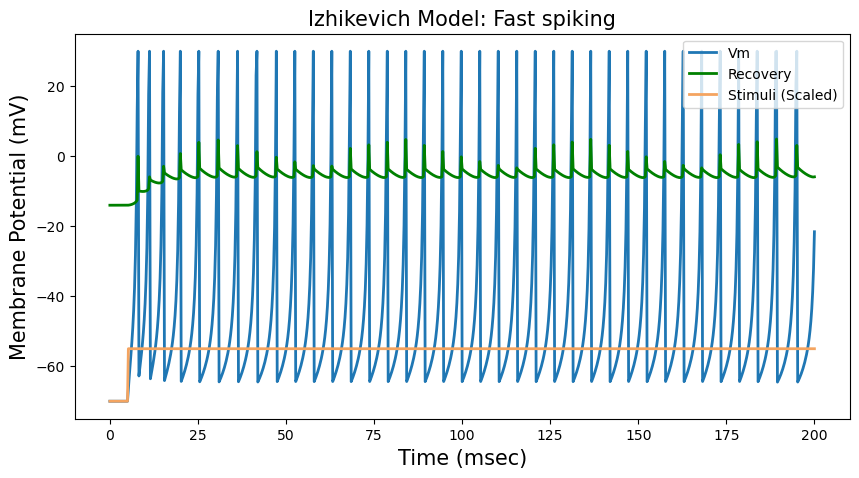

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Model and simulation parameters for three response dynamics
x  = 5
y  = 140

titles = ['Regular Spiking', 'Chattering', 'Fast spiking']
a  = [0.02, 0.02, 0.1]
b  = [0.2 , 0.2 , 0.2]
c  = [-65, -50  , -65]
d  = [8   , 2   , 2  ]

v0 = -70         # Resting potential        [mV]
T       = 200    # Simulation time          [mSec]
dt      = 0.25   # Simulation time interval [mSec]

time    = np.arange(0, T + dt, dt)  # Time array

# Define the stimulus (Step Function)

stim = np.zeros(len(time))
for i,t in enumerate(stim):
    if i > 20:
        stim[i] = 15
        
trace = np.zeros((2,len(time))) # Tracing du and dv


# Simulate

for exp in range(len(a)):
    v  = v0
    u  = b[exp]*v
    spikes = []
    for i, j in enumerate(stim):
        v += dt * (0.04*v**2 + x*v + y - u + stim[i]) 
        u += dt * a[exp]*(b[exp]*v-u)
        if v > 30:
            trace[0,i] = 30
            v = c[exp] 
            u += d[exp]
        else:
            trace[0,i] = v 
            trace[1,i] = u
            
    # Plot 
    
    plt.figure(figsize=(10,5))
    plt.title('Izhikevich Model: {}'.format(titles[exp]), fontsize=15) 
    plt.ylabel('Membrane Potential (mV)', fontsize=15) 
    plt.xlabel('Time (msec)', fontsize=15)
    plt.plot(time, trace[0], linewidth=2, label = 'Vm')
    plt.plot(time, trace[1], linewidth=2, label = 'Recovery', color='green')
    plt.plot(time, stim + v0, label = 'Stimuli (Scaled)', color='sandybrown', linewidth=2)
    plt.legend(loc=1)